# Makes Plots for final project 

In [1]:
# imports
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import cm 
from utils_2D import truncate_colormap, media_cmap
import sys
from math import sin, cos, pi, tanh
from random import seed
from numpy.random import random
from numpy import exp

In [56]:
from utils_2D import convolve_matrix, w_matrix 

# Params to play with
eps =0.05; res=50
V=1 # set v order 1
dt = 1/2*(1/res)*V/5 # dt based on the CFL condition  - PLAY
c = 1 # pressure coefficient
erode_factor = 50
gap=5

dim = int(np.ceil(res*(1+2*eps))) # expand range to get good communication length

phi_rand = random((dim, dim))
rho0 = np.ones((res,res))

smoothed = convolve_matrix(phi_rand, eps, res)/1.3


Text(0.5, 1.0, 'Sample Initial Condition')

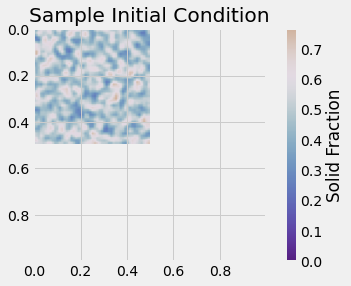

In [57]:
plt.style.use("fivethirtyeight")
plt.imshow(smoothed, cmap=media_cmap, vmin=0)
plt.xticks(ticks=np.arange(0,101,20), labels=np.round(np.arange(0,1, .2), 2))
plt.yticks(ticks=np.arange(0,101,20), labels=(np.round(np.arange(0,1, .2), 2)))
cbar = plt.colorbar()
cbar.set_label("Solid Fraction")
plt.title("Sample Initial Condition")
#plt.savefig("plots/sample_init_conditions.png", dpi=200)

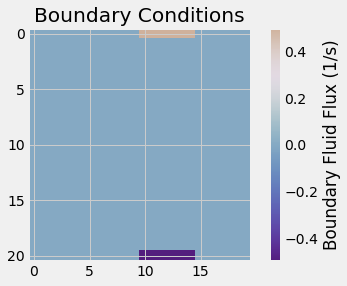

In [48]:
# Boundary Conditions
BC_y = np.zeros((rho0.shape[0]+1,rho0.shape[1]))
start = int(res/2)
BC_y[0, start:start+gap] = np.ones(gap)/2
BC_y[-1, start:start+gap] = -np.ones(gap)/2

plt.imshow(BC_y, cmap=media_cmap)
plt.title("Boundary Conditions")
cbar = plt.colorbar()
cbar.set_label("Boundary Fluid Flux (1/s)")
plt.savefig("plots/sample_boundary_conditions.png", dpi=200)

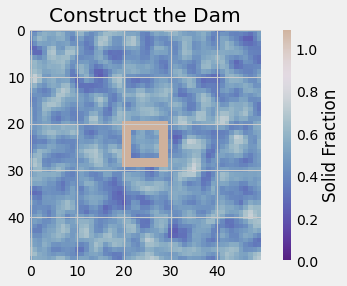

In [73]:
# adding the fortress
fort = smoothed.copy()
fstart = int(res/2-res/10); fend = int(res/2+res/10)
fgap = int(res/20)
fort[fstart:fend, fstart:fend] = np.ones((fend-fstart, fend-fstart))*1.1
fort[fstart+fgap:fend-fgap, fstart+fgap:fend-fgap] = smoothed[fstart+fgap:fend-fgap, fstart+fgap:fend-fgap]
plt.style.use("fivethirtyeight")
plt.imshow(fort, cmap=media_cmap, vmin=0)
#plt.xticks(ticks=np.arange(0,101,20), labels=np.round(np.arange(0,1, .2), 2))
#plt.yticks(ticks=np.arange(0,101,20), labels=(np.round(np.arange(0,1, .2), 2)))
cbar = plt.colorbar()
cbar.set_label("Solid Fraction")
plt.title("Construct the Dam")
plt.savefig("plots/dam_implement.png", dpi=150)

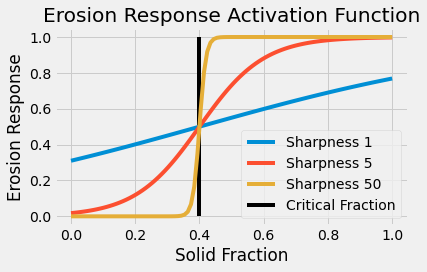

In [87]:
# update phi based on changes to rho
def psi(phi, c1 =0.5, w=5, phistar=0.4, c2=0.5):
    return c1*tanh(w*(phi-phistar))+c2

xs = np.linspace(0, 1,100)
ys = [psi(x) for x in xs]
y2 = [psi(x, c1=0.5, w=50, phistar=0.4, c2=0.5) for x in xs]
y3 = [psi(x, c1=0.5, w=1, phistar=0.4, c2=0.5) for x in xs]
plt.plot(xs, y3, label="Sharpness 1")
plt.plot(xs, ys, label="Sharpness 5")
plt.plot(xs, y2, label="Sharpness 50")
plt.vlines(0.4, ymin=0, ymax=1, label="Critical Fraction")
plt.title("Erosion Response Activation Function")
plt.xlabel("Solid Fraction")
plt.ylabel("Erosion Response")
plt.legend()
plt.tight_layout()
plt.savefig("plots/activation_function.png", dpi=150)

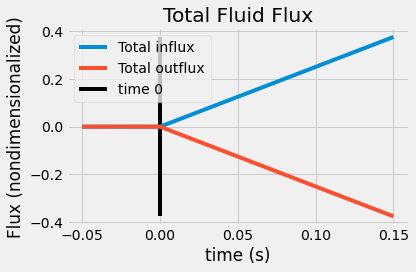

In [94]:
# ramp up conditions
ts = np.linspace(-0.05, 0.15, 1000)
fin = [2.5*max(0, t) for t in ts]
fout = [-2.5*max(0,t) for t in ts]
plt.plot(ts, fin, label="Total influx")
plt.plot(ts, fout, label="Total outflux")
plt.vlines(0, ymin=np.min(fout), ymax =np.max(fin), label="time 0")
plt.title("Total Fluid Flux")
plt.xlabel("time (s)")
plt.ylabel("Flux (nondimensionalized)")
plt.legend()
plt.tight_layout()
plt.savefig("plots/fluid_flux.png", dpi=150)

In [92]:
ts

array([0.        , 0.00015015, 0.0003003 , 0.00045045, 0.0006006 ,
       0.00075075, 0.0009009 , 0.00105105, 0.0012012 , 0.00135135,
       0.0015015 , 0.00165165, 0.0018018 , 0.00195195, 0.0021021 ,
       0.00225225, 0.0024024 , 0.00255255, 0.0027027 , 0.00285285,
       0.003003  , 0.00315315, 0.0033033 , 0.00345345, 0.0036036 ,
       0.00375375, 0.0039039 , 0.00405405, 0.0042042 , 0.00435435,
       0.0045045 , 0.00465465, 0.0048048 , 0.00495495, 0.00510511,
       0.00525526, 0.00540541, 0.00555556, 0.00570571, 0.00585586,
       0.00600601, 0.00615616, 0.00630631, 0.00645646, 0.00660661,
       0.00675676, 0.00690691, 0.00705706, 0.00720721, 0.00735736,
       0.00750751, 0.00765766, 0.00780781, 0.00795796, 0.00810811,
       0.00825826, 0.00840841, 0.00855856, 0.00870871, 0.00885886,
       0.00900901, 0.00915916, 0.00930931, 0.00945946, 0.00960961,
       0.00975976, 0.00990991, 0.01006006, 0.01021021, 0.01036036,
       0.01051051, 0.01066066, 0.01081081, 0.01096096, 0.01111